# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

5. married couples are more likely to get approved
6. the loan amount/loan time has an impact
7. self employed people are less likely to get approved
8. all things accounted is a man more likely to get approved vice a woman?

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np

# cool custom functions
import sys
sys.path.insert(0, '/home/henri/Documents/Lighthouse-lab/lighthouse-data-notes')
import ccf_module as ccf

df = pd.read_csv("/home/henri/Documents/Lighthouse-lab/Databases/w7-d4-db/data.csv")
df = df.drop('Loan_ID',axis=1) 

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (12,8)

## Data Exploration

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
ccf.unique_df_cols(df)

Only printing the first 20 unique variables
Categorical variables -------------------------------------------- 

There are 2 unique Gender
['Male' 'Female' nan] 

There are 2 unique Married
['No' 'Yes' nan] 

There are 4 unique Dependents
['0' '1' '2' '3+' nan] 

There are 2 unique Education
['Graduate' 'Not Graduate'] 

There are 2 unique Self_Employed
['No' 'Yes' nan] 

There are 505 unique ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600] 

There are 3 unique Property_Area
['Urban' 'Rural' 'Semiurban'] 

There are 2 unique Loan_Status
['Y' 'N'] 

Numerical variables -------------------------------------------- 

There are 505 unique ApplicantIncome
The median is  3812.5, mean 5403.459283387622

[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600] 

There are 287 unique CoapplicantIncome
The median is  1188.5, mean 1621.2457980

In [5]:
df.columns.to_list()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# most common values 
df.mode().iloc[0]

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome           2500
CoapplicantIncome            0
LoanAmount                 120
Loan_Amount_Term           360
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object

### Null Values preparation
One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [8]:
df.isnull().sum()[df.isnull().sum() > 0]/df.isnull().count()*100

ApplicantIncome           NaN
CoapplicantIncome         NaN
Credit_History       8.143322
Dependents           2.442997
Education                 NaN
Gender               2.117264
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Loan_Status               NaN
Married              0.488599
Property_Area             NaN
Self_Employed        5.211726
dtype: float64

In [9]:
['Dependents','Credit_History', 'Married'] # ['0',0,'No']
['LoanAmount','Loan_Amount_Term'] # mean
['Gender','Self_Employed'] # cat values by probability

['Gender', 'Self_Employed']

#### Fillna with its corresponding 0 value

In [10]:
df['Married'] = df['Married'].fillna('No')
df['Dependents'] = df['Dependents'].fillna('0') 
df['Credit_History'] = df['Credit_History'].fillna(0)

In [11]:
#I do not like the 1/0 in numerical format when it is mean to express a nominal category
def getNominalVal(val):
    if val == 1:
        res='Yes'
        return res
    else:
        res='No'
        return res
#I want my label to be either one or 0y
def getRightLabel(val):
    if val == 'Y':
        res=1
        return res
    else:
        res=0
        return res
df['Credit_History'] = df.apply(lambda x: getNominalVal(x.Credit_History),axis=1)
df['Loan_Status'] = df.apply(lambda x: getRightLabel(x.Loan_Status),axis=1)

In [12]:
df[['LoanAmount','Loan_Amount_Term']].mean()

LoanAmount          146.412162
Loan_Amount_Term    342.000000
dtype: float64

#### Fillna with its corresponding mean

In [13]:
# mean fill
# df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
# df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df[['LoanAmount','Loan_Amount_Term']] = df[['LoanAmount','Loan_Amount_Term']].fillna(df[['LoanAmount','Loan_Amount_Term']].mean())

#### Fillna with its presence percentage on non NAN observations

In [14]:
# probability (I wonder if it is possible to use the probabilities bellow to fill mutliple columns)
df[['Gender','Self_Employed']].value_counts(normalize=True)

Gender  Self_Employed
Male    No               0.706503
Female  No               0.156415
Male    Yes              0.110721
Female  Yes              0.026362
dtype: float64

In [15]:
print(df.Self_Employed.value_counts(normalize=True),'\n')
print(df.Gender.value_counts(normalize=True))

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64 

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


In [16]:
df['Gender'] = df['Gender'].fillna(pd.Series(np.random.choice(['Male', 'Female'], 
                                                     p=[0.813644,0.186356], 
                                                     size=len(df))))

In [17]:
df['Self_Employed'] = df['Self_Employed'].fillna(pd.Series(np.random.choice(['No', 'Yes'], 
                                                     p=[0.859107,0.140893], 
                                                     size=len(df))))

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,Yes,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Yes,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,Yes,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,Yes,Urban,1


In [19]:
df.isnull().sum()[df.isnull().sum() > 0]/df.isnull().count()*100

Gender              NaN
Married             NaN
Dependents          NaN
Education           NaN
Self_Employed       NaN
ApplicantIncome     NaN
CoapplicantIncome   NaN
LoanAmount          NaN
Loan_Amount_Term    NaN
Credit_History      NaN
Property_Area       NaN
Loan_Status         NaN
dtype: float64

## Feature Engineering 
### Binned Values

In [20]:
#bin -> loanAmount, Loan_Amount_term
df.groupby(df.Loan_Amount_Term).count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Loan_Amount_Term,,,,,,,,,,,
12.0,1,1,1,1,1,1,1,1,1,1,1
36.0,2,2,2,2,2,2,2,2,2,2,2
60.0,2,2,2,2,2,2,2,2,2,2,2
84.0,4,4,4,4,4,4,4,4,4,4,4
120.0,3,3,3,3,3,3,3,3,3,3,3
180.0,44,44,44,44,44,44,44,44,44,44,44
240.0,4,4,4,4,4,4,4,4,4,4,4
300.0,13,13,13,13,13,13,13,13,13,13,13
342.0,14,14,14,14,14,14,14,14,14,14,14


Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [21]:
# 1.How many applicants have a Credit_History? (Credit_History has value 1 for those who have a credit history and 0 otherwise)
df.iloc[ :,0:1].groupby(df.Credit_History).count()

,Gender
Credit_History,
No,139
Yes,475


In [22]:
df.ApplicantIncome.median()

3812.5

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


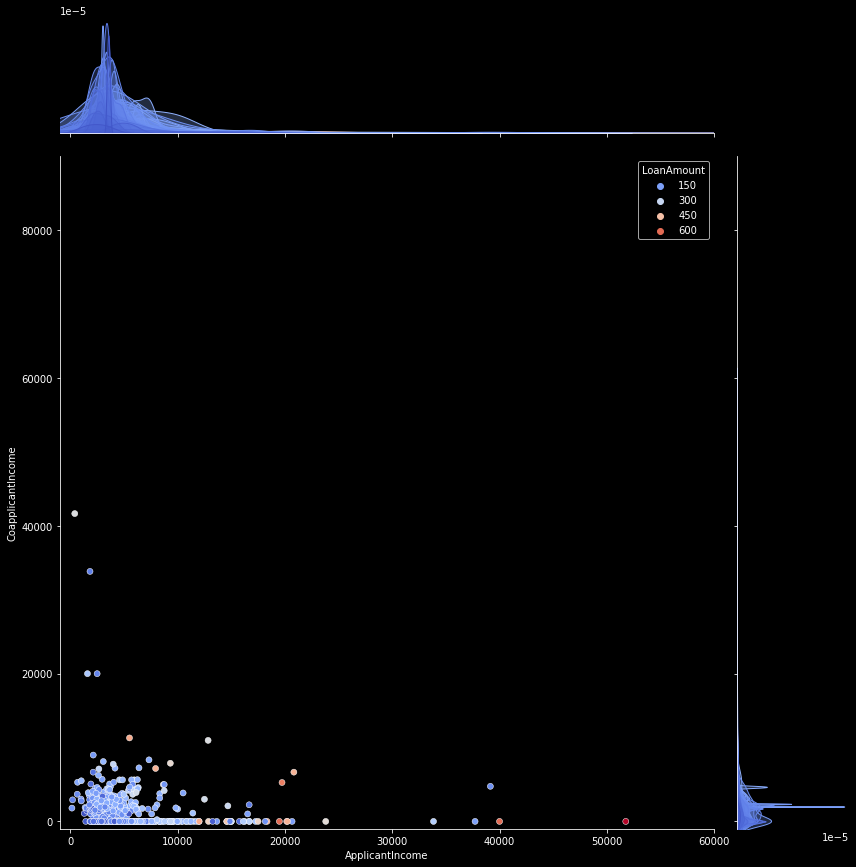

In [24]:
# 2.Is the ApplicantIncome distribution in line with your expectation? Similarly, what about CoapplicantIncome?
# in
import seaborn as sns

#sns.set_theme(style="darkgrid")

g = sns.jointplot(x="ApplicantIncome", y="CoapplicantIncome",xlim=(-1000, 60000), ylim=(-1000, 90000), data=df,hue='LoanAmount',palette='coolwarm', height=12)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [25]:
ccf.unique_df_cols(df)

Only printing the first 20 unique variables
Categorical variables -------------------------------------------- 

There are 2 unique Gender
['Male' 'Female'] 

There are 2 unique Married
['No' 'Yes'] 

There are 4 unique Dependents
['0' '1' '2' '3+'] 

There are 2 unique Education
['Graduate' 'Not Graduate'] 

There are 2 unique Self_Employed
['No' 'Yes'] 

There are 505 unique ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600] 

There are 2 unique Credit_History
['Yes' 'No'] 

There are 3 unique Property_Area
['Urban' 'Rural' 'Semiurban'] 

There are 2 unique Loan_Status
[1 0] 

Numerical variables -------------------------------------------- 

There are 505 unique ApplicantIncome
The median is  3812.5, mean 5403.459283387622

[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600] 

There are 287 unique CoapplicantIncome
The median 

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [26]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [27]:
num_feats

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_Status']

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

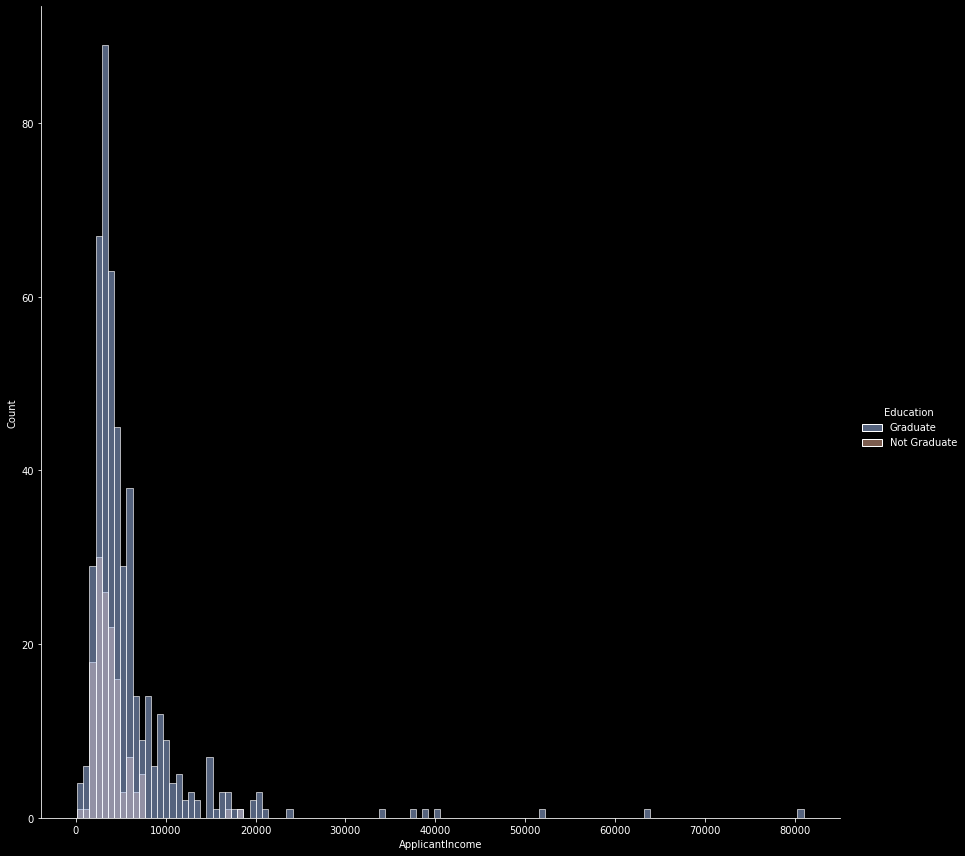

In [28]:
g = sns.displot(df, x='ApplicantIncome', hue="Education",height=12,palette='coolwarm')

Look at the distribution of income segregated  by `Education`

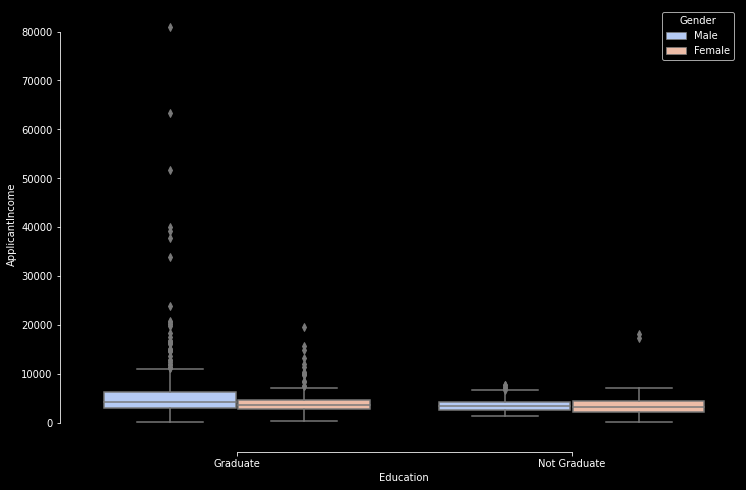

In [29]:
g = sns.boxplot(data = df, x='Education', y='ApplicantIncome',hue='Gender',palette='coolwarm')
sns.despine(offset=10, trim=True)

Look at the histogram and boxplot of LoanAmount

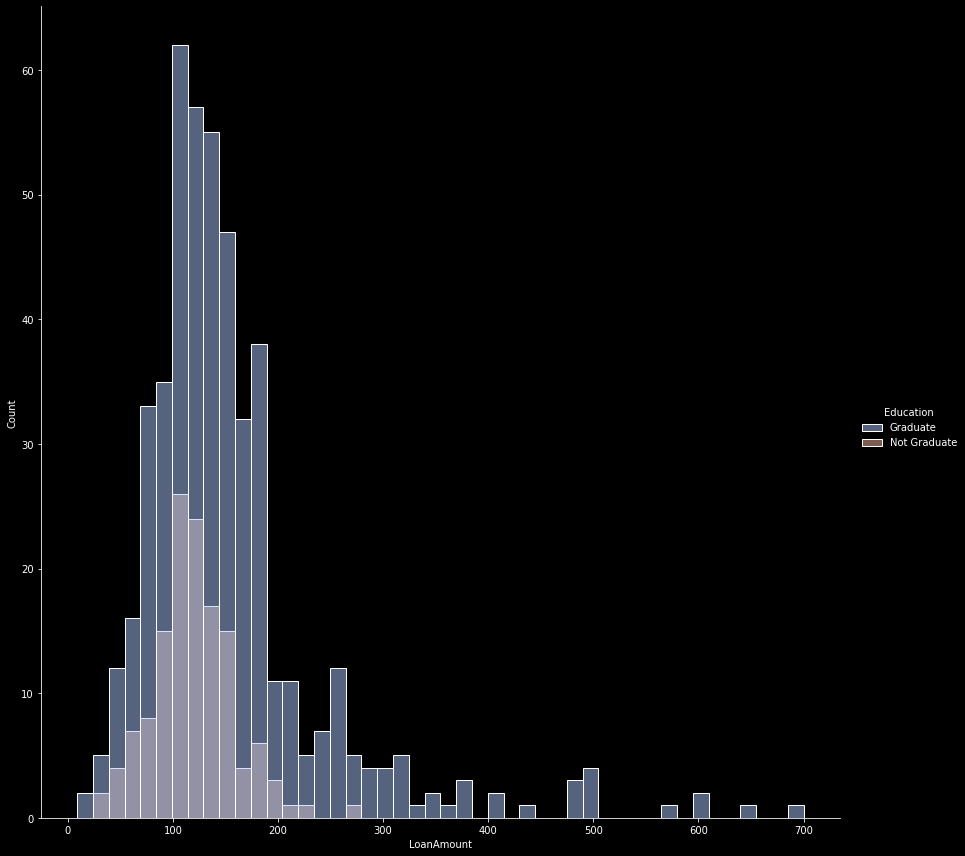

In [30]:
g = sns.displot(df, x='LoanAmount', hue="Education",height=12,palette='coolwarm')

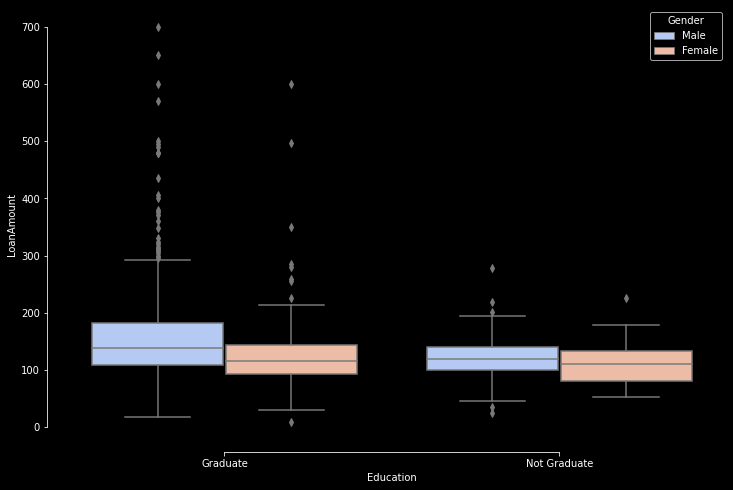

In [31]:
g = sns.boxplot(data = df, x='Education', y='LoanAmount',hue='Gender',palette='coolwarm')
sns.despine(offset=10, trim=True)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [32]:
df[cat_feats]

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,Yes,Urban
1,Male,Yes,1,Graduate,No,Yes,Rural
2,Male,Yes,0,Graduate,Yes,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Yes,Urban
4,Male,No,0,Graduate,No,Yes,Urban
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Yes,Rural
610,Male,Yes,3+,Graduate,No,Yes,Rural
611,Male,Yes,1,Graduate,No,Yes,Urban
612,Male,Yes,2,Graduate,No,Yes,Urban


In [33]:
pd.pivot_table(df,index=['Gender','Married','Property_Area'],columns=['Loan_Status','Credit_History'],aggfunc=np.mean, fill_value=0)

ApplicantIncome                             \
Loan_Status                                0                          1   
Credit_History                            No          Yes            No   
Gender Married Property_Area                                              
Female No      Rural                0.000000  5177.571429   3429.000000   
               Semiurban         3614.500000  4816.833333   2839.000000   
               Urban             2781.857143  2801.666667   2876.666667   
       Yes     Rural             5500.000000  4583.000000   4100.000000   
               Semiurban         2149.000000     0.000000   3572.000000   
               Urban             7072.500000  2855.500000      0.000000   
Male   No      Rural             4910.000000  7374.500000   4917.000000   
               Semiurban         6401.333333  5106.500000   3811.000000   
               Urban             6585.142857  4219.076923  11881.000000   
       Yes     Rural             7629.714286  6208.550000   4638.000000   
               Semiurban         3964.944444  8443.363636   8494.000000   
               Urban             4598.055556  4696.764706   5140.750000   

                                          CoapplicantIncome               \
Loan_Status                                               0                
Credit_History                        Yes                No          Yes   
Gender Married Property_Area                                               
Female No      Rural          3547.200000          0.000000   601.000000   
               Semiurban      5838.619048        300.000000   286.166667   
               Urban          5456.571429       6218.571429     0.000000   
       Yes     Rural          7142.000000          0.000000     0.000000   
               Semiurban      4472.375000       3237.000000     0.000000   
               Urban          9788.333333       1720.000000  2166.000000   
Male   No      Rural          4641.920000       1184.875000  1496.000000   
               Semiurban      5477.090909        257.000000   667.000000   
               Urban          4129.727273       1159.714286  3301.538462   
       Yes     Rural          5390.500000       2028.666667  1393.550000   
               Semiurban      5108.361702       2066.222222  3174.818182   
               Urban          6343.714286       2017.444444  2256.058824   

                                                        LoanAmount  \
Loan_Status                             1                        0   
Credit_History                         No          Yes          No   
Gender Married Property_Area                                         
Female No      Rural          1492.500000   534.900000    0.000000   
               Semiurban      4490.000000   207.523810  115.000000   
               Urban           541.666667   503.571429  138.630309   
       Yes     Rural             0.000000     0.000000  105.000000   
               Semiurban      1954.000000  1601.562500  178.000000   
               Urban             0.000000   611.000000  203.000000   
Male   No      Rural             0.000000  1602.640000  116.000000   
               Semiurban      1392.500000  1559.151515  146.166667   
               Urban             0.000000  1102.545455  146.058880   
       Yes     Rural          2304.625000  2074.114839  158.658301   
               Semiurban      1843.250000  1659.255319  160.333333   
               Urban          2237.666667  1403.633766  141.578453   

                                                                  \
Loan_Status                                        1               
Credit_History                       Yes          No         Yes   
Gender Married Property_Area                                       
Female No      Rural          132.428571  112.500000  121.400000   
               Semiurban      120.500000  124.500000  118.896396   
               Urban          102.333333   99.666667   99.642857   
       Yes    

In [34]:
#!pip install pivottablejs
from pivottablejs import pivot_ui
pivot_ui(df)

In [35]:
#g = sns.pairplot(df.loc[:,df.dtypes != 'object'],hue='Credit_History',height=5)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



In [36]:
#set as the mean

Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [37]:
#Done

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [38]:
numeric_df = df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
numeric_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,3.767082,-inf,2.165577,2.556303,Yes,Urban,0.0
1,Male,Yes,1,Graduate,No,3.661150,3.178401,2.107210,2.556303,Yes,Rural,-inf
2,Male,Yes,0,Graduate,Yes,3.477121,-inf,1.819544,2.556303,Yes,Urban,0.0
3,Male,Yes,0,Not Graduate,No,3.412124,3.372544,2.079181,2.556303,Yes,Urban,0.0
4,Male,No,0,Graduate,No,3.778151,-inf,2.149219,2.556303,Yes,Urban,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,3.462398,-inf,1.851258,2.556303,Yes,Rural,0.0
610,Male,Yes,3+,Graduate,No,3.613419,-inf,1.602060,2.255273,Yes,Rural,0.0
611,Male,Yes,1,Graduate,No,3.906981,2.380211,2.403121,2.556303,Yes,Urban,0.0
612,Male,Yes,2,Graduate,No,3.879841,-inf,2.271842,2.556303,Yes,Urban,0.0


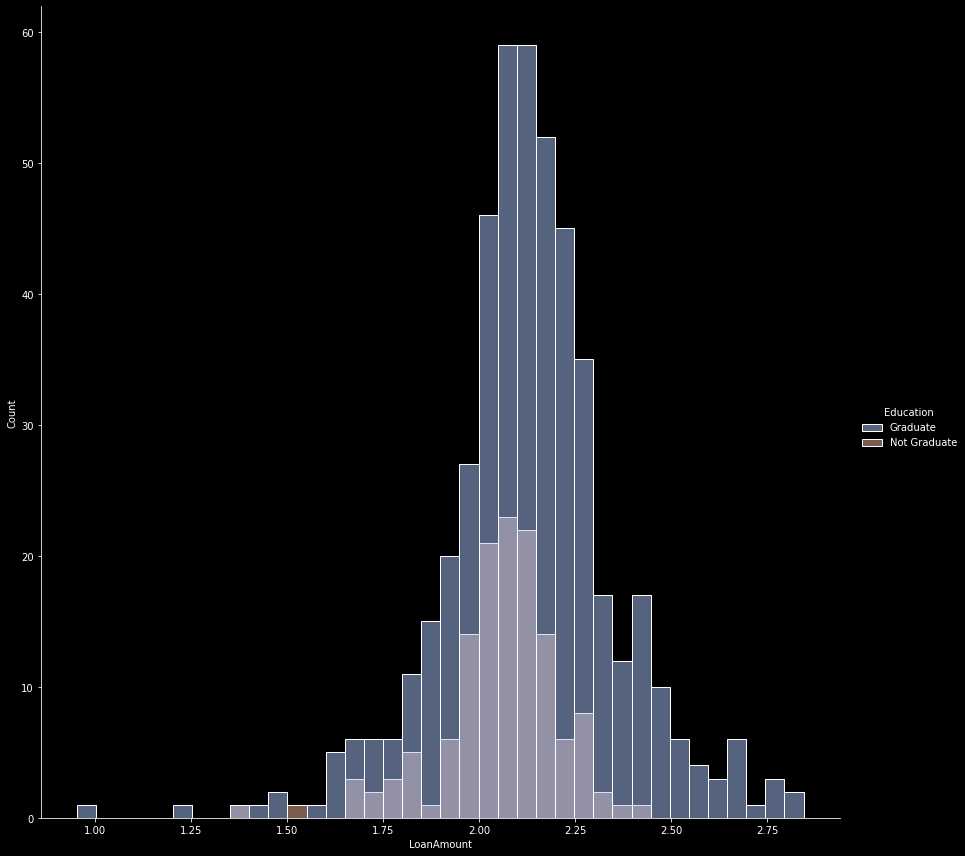

In [39]:
g = sns.displot(numeric_df, x='LoanAmount', hue="Education",height=12,palette='coolwarm')

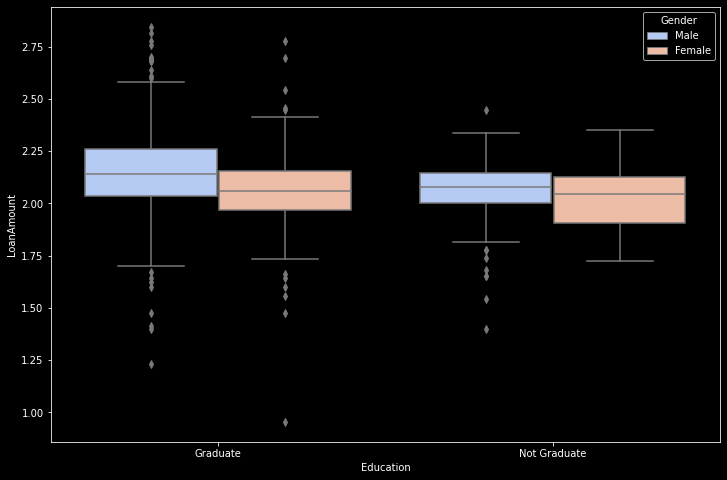

In [40]:
g = sns.boxplot(data = numeric_df, x='Education', y='LoanAmount',hue='Gender',palette='coolwarm')

Combine both incomes as total income and take a log transformation of the same.

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,Yes,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Yes,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,Yes,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,Yes,Urban,1


In [42]:
#There is a slight imbalance
df.groupby(df.Loan_Status).count().iloc[:2:,2]

Loan_Status
0    192
1    422
Name: Dependents, dtype: int64

## 4. Building a Predictive Model

In [43]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].drop('Loan_Status').index.tolist()

In [44]:
num_feats

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Loan_Status',axis=1), df['Loan_Status'], test_size=0.33, random_state=42)

In [46]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [47]:
numeric_transformer = Pipeline(steps=[
    ('MICE', IterativeImputer(initial_strategy='median')),
    ('scaler', StandardScaler())])
numeric_transformer.steps.append(('kbest', SelectKBest(k=3)))

In [48]:
#simple Imputer is not really needed since there are nill NaNs
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))])
# dummy cariable creation
categorical_transformer.steps.append(['ohc',OneHotEncoder(handle_unknown='ignore')])
# Dense Transformer needed adter one hot encoder
categorical_transformer.steps.append(['to_dense',ccf.ToDenseTransformer()])
# we only want the PCAs with the most variance
categorical_transformer.steps.append(['pca',PCA(n_components=3)])

In [49]:
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, num_feats),
        ('cat', categorical_transformer, cat_feats)])

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,  RandomForestClassifier

In [51]:
base_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('gauss', GaussianNB())])

In [52]:
base_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('MICE',
                                                                   IterativeImputer(initial_strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('kbest',
                                                                   SelectKBest(k=3))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline

In [53]:
print("model score: %.3f" % base_model.score(X_train, y_train))
print("model score: %.3f" % base_model.score(X_test, y_test))

model score: 0.735
model score: 0.650


In [54]:
from sklearn.metrics import classification_report, confusion_matrix 
y_pred= base_model.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred)) 
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.52      0.17      0.25        72
           1       0.67      0.92      0.77       131

    accuracy                           0.65       203
   macro avg       0.59      0.54      0.51       203
weighted avg       0.62      0.65      0.59       203



array([[ 12,  60],
       [ 11, 120]])

Try paramater grid search to improve the results

In [55]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
regressors = [SVC(), GradientBoostingClassifier(), RandomForestClassifier()]

In [56]:
#GaussNB (nill params)
base_model2 = Pipeline([('preprocessor', preprocessor),
                      ('regressors', SVC())])
# random forest params (https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
rf_params = {'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
'max_depth' : [int(x) for x in np.linspace(10, 60, num = 6)],
'min_samples_leaf' : [1, 2, 4],
'min_samples_split' : [2, 5, 10]}
# gradient boost regressor
gradien_boost_params = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001]}
#SVC
Svc_params = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}  



In [57]:
sorted(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [58]:
# sorted(base_model2.get_params().keys())
params = [{'regressors':[SVC()],
'regressors__C': [0.1, 1, 10, 100, 1000],
'regressors__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'regressors__kernel': ['poly','rbf'],

'preprocessor__cat__pca__n_components':range(3,5,1),
'preprocessor__num__kbest__k':range(2,5,1)},
    
{'regressors':[RandomForestClassifier()],
'regressors__n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
'regressors__max_depth' : [int(x) for x in np.linspace(10, 60, num = 6)],
'regressors__min_samples_leaf' : [1, 2, 4],
'regressors__min_samples_split' : [2, 5, 10],

'preprocessor__cat__pca__n_components':range(3,5,1),
'preprocessor__num__kbest__k':range(2,5,1)},

{'regressors':[GradientBoostingClassifier()],
'regressors__max_depth':range(5,16,2), 
'regressors__min_samples_split':range(200,1001,200),
'regressors__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],

'preprocessor__cat__pca__n_components':range(3,5,1),
'preprocessor__num__kbest__k':range(2,5,1)}
]

In [155]:
tuned_model = RandomizedSearchCV(base_model2,params,verbose=1,n_jobs=-1,n_iter=150, cv=5,random_state=42).fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   31.7s finished


In [ ]:
print("model score: %.3f" % tuned_model.score(X_train, y_train)) 
print("model score: %.3f" % tuned_model.score(X_test, y_test))
print(tuned_model.best_estimator_.get_params)
tuned_model.best_params_

In [61]:
import pickle
# save the model to disk
filename = 'pickledRandCVModel.sav' # .sav file extension are commonly used in video games as savepoint
pickle.dump(tuned_model, open(filename, 'wb'))

In [62]:
# print classification report 
print(classification_report(y_test, y_pred)) 
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.52      0.17      0.25        72
           1       0.67      0.92      0.77       131

    accuracy                           0.65       203
   macro avg       0.59      0.54      0.51       203
weighted avg       0.62      0.65      0.59       203



array([[ 12,  60],
       [ 11, 120]])

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [63]:
test1 = df.loc[0].drop('Loan_Status').to_json()

In [182]:
test2 = ['Male', 'Yes', '0', 'Graduate', 'Yes', 10000, 10000, 10, 10, 1, 'Urban']

In [73]:
test2

['Male', 'Yes', '0', 'Graduate', 'Yes', 10000, 10000, 10, 10, 1, 'Urban']

In [74]:
test2[1]

'Yes'

In [ ]:
df2 = pd.DataFrame()

In [162]:
 ds = pd.Series(test2,index=['Gender',
                                        'Married',
                                        'Dependents',
                                        'Education',
                                        'Self_Employed',
                                        'ApplicantIncome',
                                        'CoapplicantIncome',
                                        'LoanAmount',
                                        'Loan_Amount_Term',
                                        'Credit_History',
                                        'Property_Area',
                                        ])

In [186]:
ds.to_frame().T

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,Yes,10000,10000,10,10,1,Urban


NameError: name 'ds' is not defined

In [165]:
#pretty cool that it converst from pd to  
ds = ds.values.reshape(-1,2)
ds

ValueError: cannot reshape array of size 11 into shape (2)

In [175]:
drunk = np.array(test2).reshape(1, -1)

In [176]:
type(ds)

pandas.core.series.Series

In [191]:
tes = tuned_model.predict(X_test)

ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 12 and input n_features is 11.

In [181]:
tes = tuned_model.predict_proba(np.array( [test2,]))

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [ ]:
predicts always 